In [3]:
import cv2

from sklearn import datasets as dt
from sklearn import tree as tr

from matplotlib import pyplot as plt

In [4]:
iris = dt.load_iris() # dados do iris 

# iris = Dicionario
# iris.data =  Array dos dados 
# iris.target = todoas os target e quais classes pertence

X = iris.data[:, 2:]# Todas as linhas da segunda coluna ate o final
y = iris.target

In [5]:
len(X)

150

In [6]:
len(y)

150

Treinamento de algoritimo

In [7]:
# Define
model_tree = tr.DecisionTreeClassifier()# quando nao tenho nenhum criterio de parada na arvore ela cresce aleatoriamente 
# controe, do tamanho maximo da quebra de arvores. ou seja o tamanhomaxiomo de crecimento da arvore ou a qtd de recorte do espaco

# min_samples_leaf: = # regular evitar o cfecimento da arvore , = o num miniomo de amostraque a folha deve ter antes de fazer uma nova separacao e fgerar nós filhos 
# Training ( Fit)
model_tree.fit( X, y )
# Predict


DecisionTreeClassifier()

In [8]:
# quais os criterios que foram usados

from sklearn.tree import export_graphviz

export_graphviz(
    model_tree,
    out_file='tree.dot',
    feature_names=iris.feature_names[2:],  # Aqui você define as colunas de features que deseja usar
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

!dot -Tpng tree.dot -o tree.png

img = cv2.imread( 'tree.png')
plt.figure( figsize=( 20, 20 ) )
plt.imshow(img)

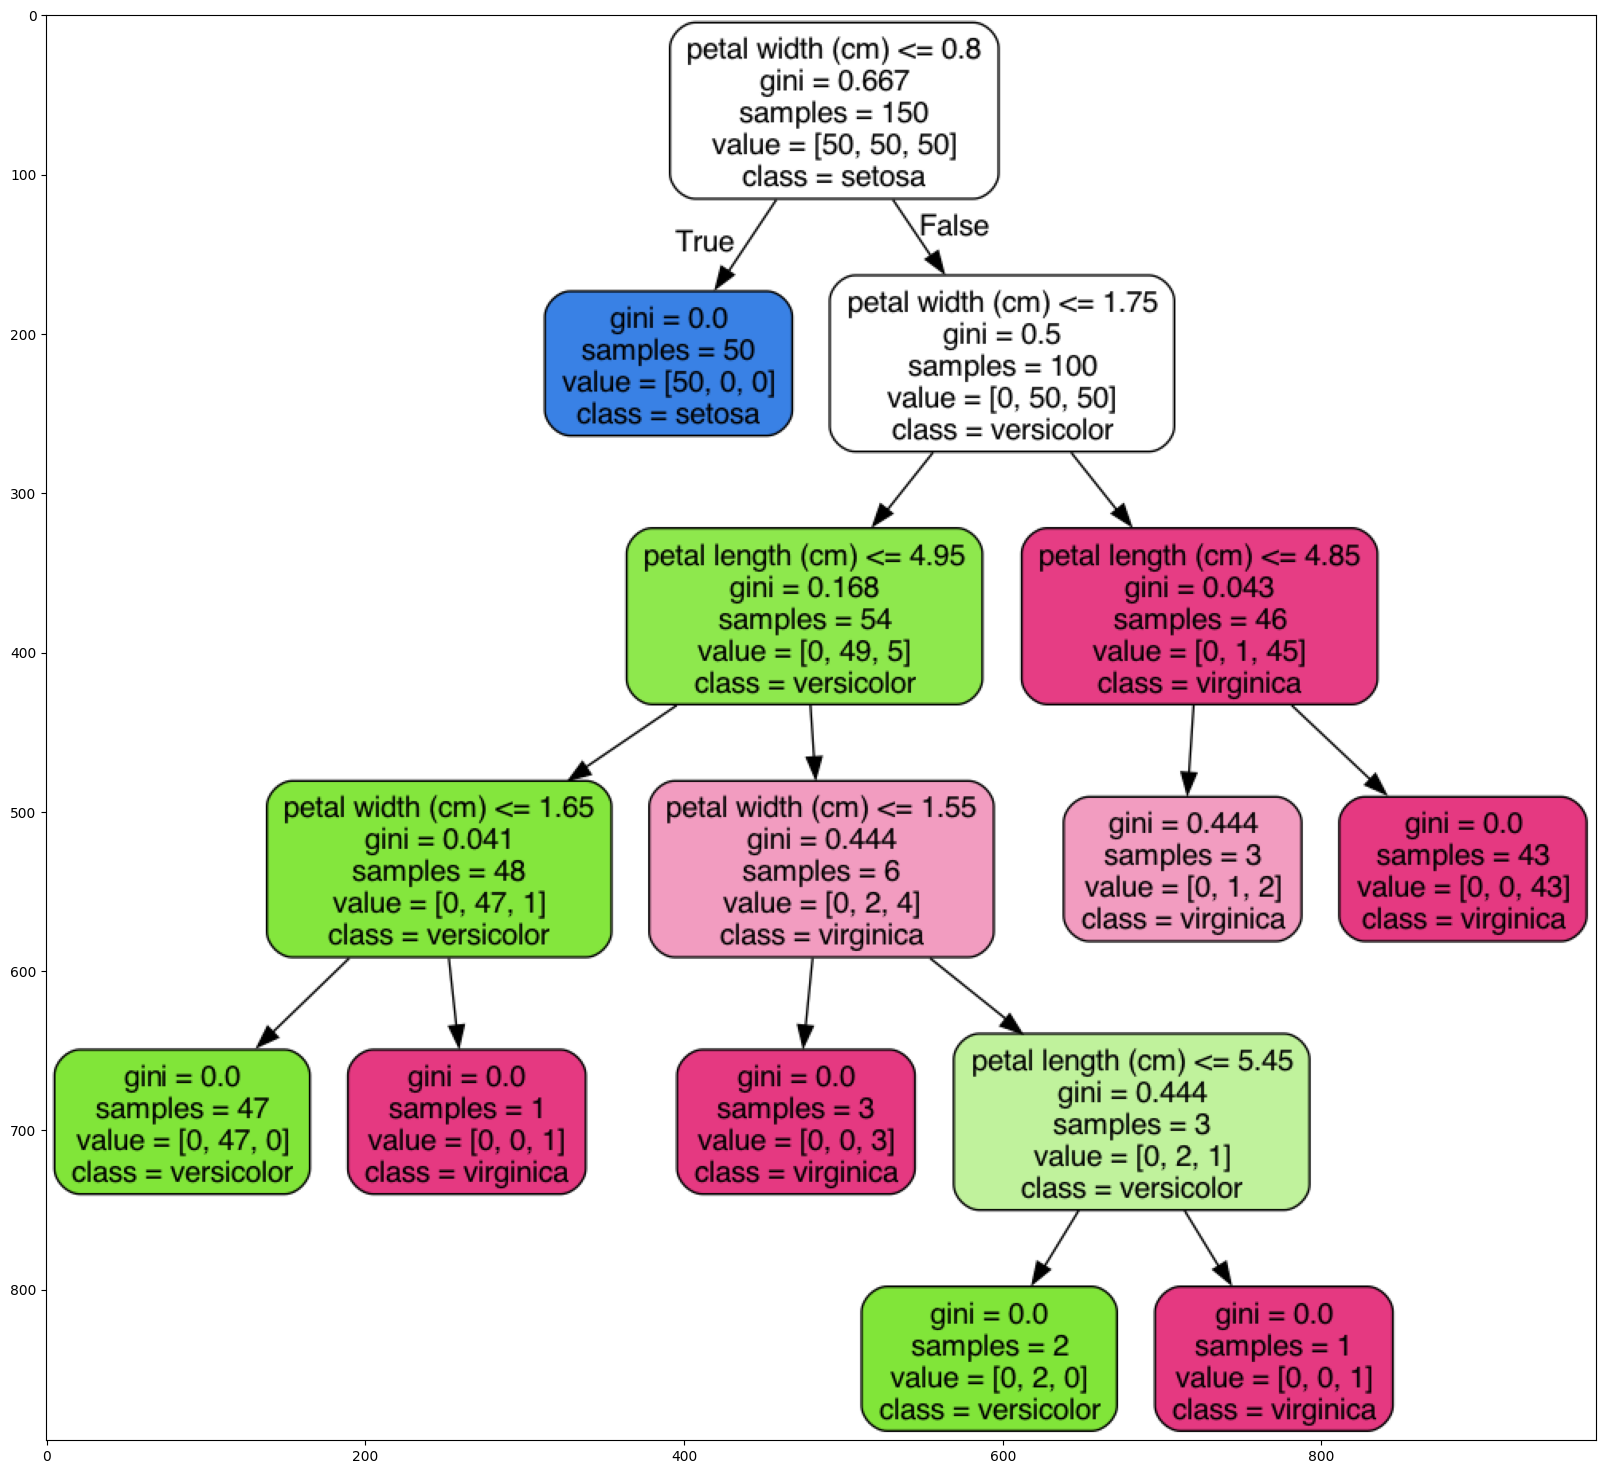

In [10]:
# Sem especificar o tamanho 

In [26]:
import pandas as pd
import numpy as np

# Criar valores aleatórios para cada flor
tamanhos_rosa = np.random.uniform(0, 2.5, 50)     # Tamanhos das pétalas de rosa
tamanhos_lírio = np.random.uniform(2.5, 5.0, 50)  # Tamanhos das pétalas de lírio
tamanhos_tulipa = np.random.uniform(5.0, 10.0, 50) # Tamanhos das pétalas de tulipa

# Criar um DataFrame com os tamanhos das pétalas e o target
data = {
    'tamanho_pétala': np.concatenate((tamanhos_rosa, tamanhos_lírio, tamanhos_tulipa)),
    'flor': ['rosa'] * 50 + ['lírio'] * 50 + ['tulipa'] * 50
}

df = pd.DataFrame(data)

# Exibir as primeiras linhas do DataFrame
print(df.head())


   tamanho_pétala  flor
0        2.387556  rosa
1        1.148351  rosa
2        1.575606  rosa
3        1.117466  rosa
4        0.488481  rosa


In [27]:
X = df[['tamanho_pétala']]
y = df['flor']


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()


In [30]:
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [24]:
accuracy = model.score(X_test, y_test)
print('Acurácia do modelo:', accuracy)


Acurácia do modelo: 1.0


In [25]:
new_data = pd.DataFrame({'tamanho_pétala': [3.0, 6.0, 1.5]})
predictions = model.predict(new_data)
print('Previsões:', predictions)


Previsões: ['lírio' 'tulipa' 'rosa']


   tamanho_pétala  flor
0        2.287130  rosa
1        2.296664  rosa
2        0.486155  rosa
3        1.650502  rosa
4        1.554339  rosa


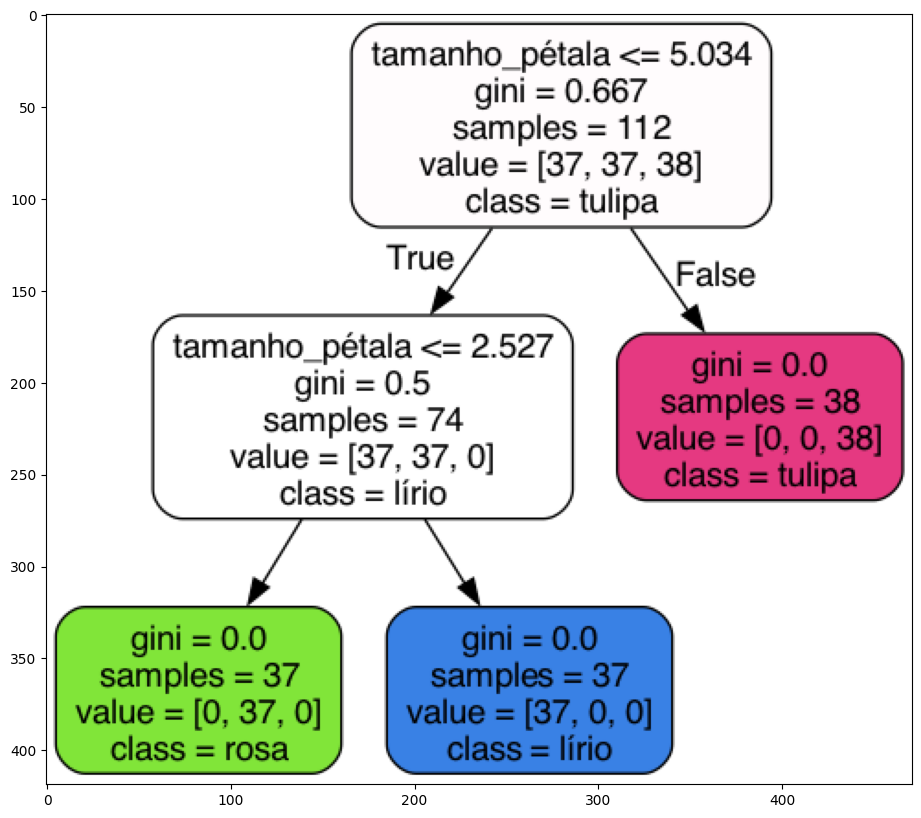

In [34]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn import datasets as dt
from sklearn import tree as tr
from sklearn.tree import export_graphviz

# Suponha que você já carregou o DataFrame df com seus dados
# Suponha também que o DataFrame contém as colunas 'rosa', 'lírio', 'tulipa' e 'target'

import pandas as pd
import numpy as np

# Criar valores aleatórios para cada flor
tamanhos_rosa = np.random.uniform(0, 2.5, 50)     # Tamanhos das pétalas de rosa
tamanhos_lírio = np.random.uniform(2.5, 5.0, 50)  # Tamanhos das pétalas de lírio
tamanhos_tulipa = np.random.uniform(5.0, 10.0, 50) # Tamanhos das pétalas de tulipa

# Criar um DataFrame com os tamanhos das pétalas e o target
data = {
    'tamanho_pétala': np.concatenate((tamanhos_rosa, tamanhos_lírio, tamanhos_tulipa)),
    'flor': ['rosa'] * 50 + ['lírio'] * 50 + ['tulipa'] * 50
}

df = pd.DataFrame(data)

# Exibir as primeiras linhas do DataFrame
print(df.head())


# Separar as colunas de features (atributos) e a coluna alvo
X = df[['tamanho_pétala']]
y = df['flor']


# Dividir os dados em conjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,)

# Criar uma instância do modelo de Árvore de Decisão
model_tree = tr.DecisionTreeClassifier()

# Treinar o modelo com os dados de treinamento
model_tree.fit(X_treino, y_treino)

# Gerar visualização da árvore em formato DOT
export_graphviz(
    model_tree,
    out_file='tree.dot',
    feature_names=X.columns,  # Usar as colunas 'rosa', 'lírio' e 'tulipa' como features
    class_names=np.unique(y_treino).astype(str),
    rounded=True,
    filled=True
)

# Converter o arquivo DOT em imagem PNG
!dot -Tpng tree.dot -o tree.png

# Carregar a imagem e exibi-la
img = cv2.imread('tree.png')
plt.figure(figsize=(15, 10))
plt.imshow(img)
